# Visualization of inversion - Kimberlite data

In [803]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [804]:
mypath = 'kimberlite_data/flightlines_grid_1600pts_16km/tfa_inversion/true_direction_flightlines/r700_int5_z050_dz220/'

In [805]:
with open(mypath+'inversion.pickle') as w:
        kimberlite = pickle.load(w)

In [806]:
with open('kimberlite_data/kimberlite_model.pickle') as w:
        kimberlite_model = pickle.load(w)

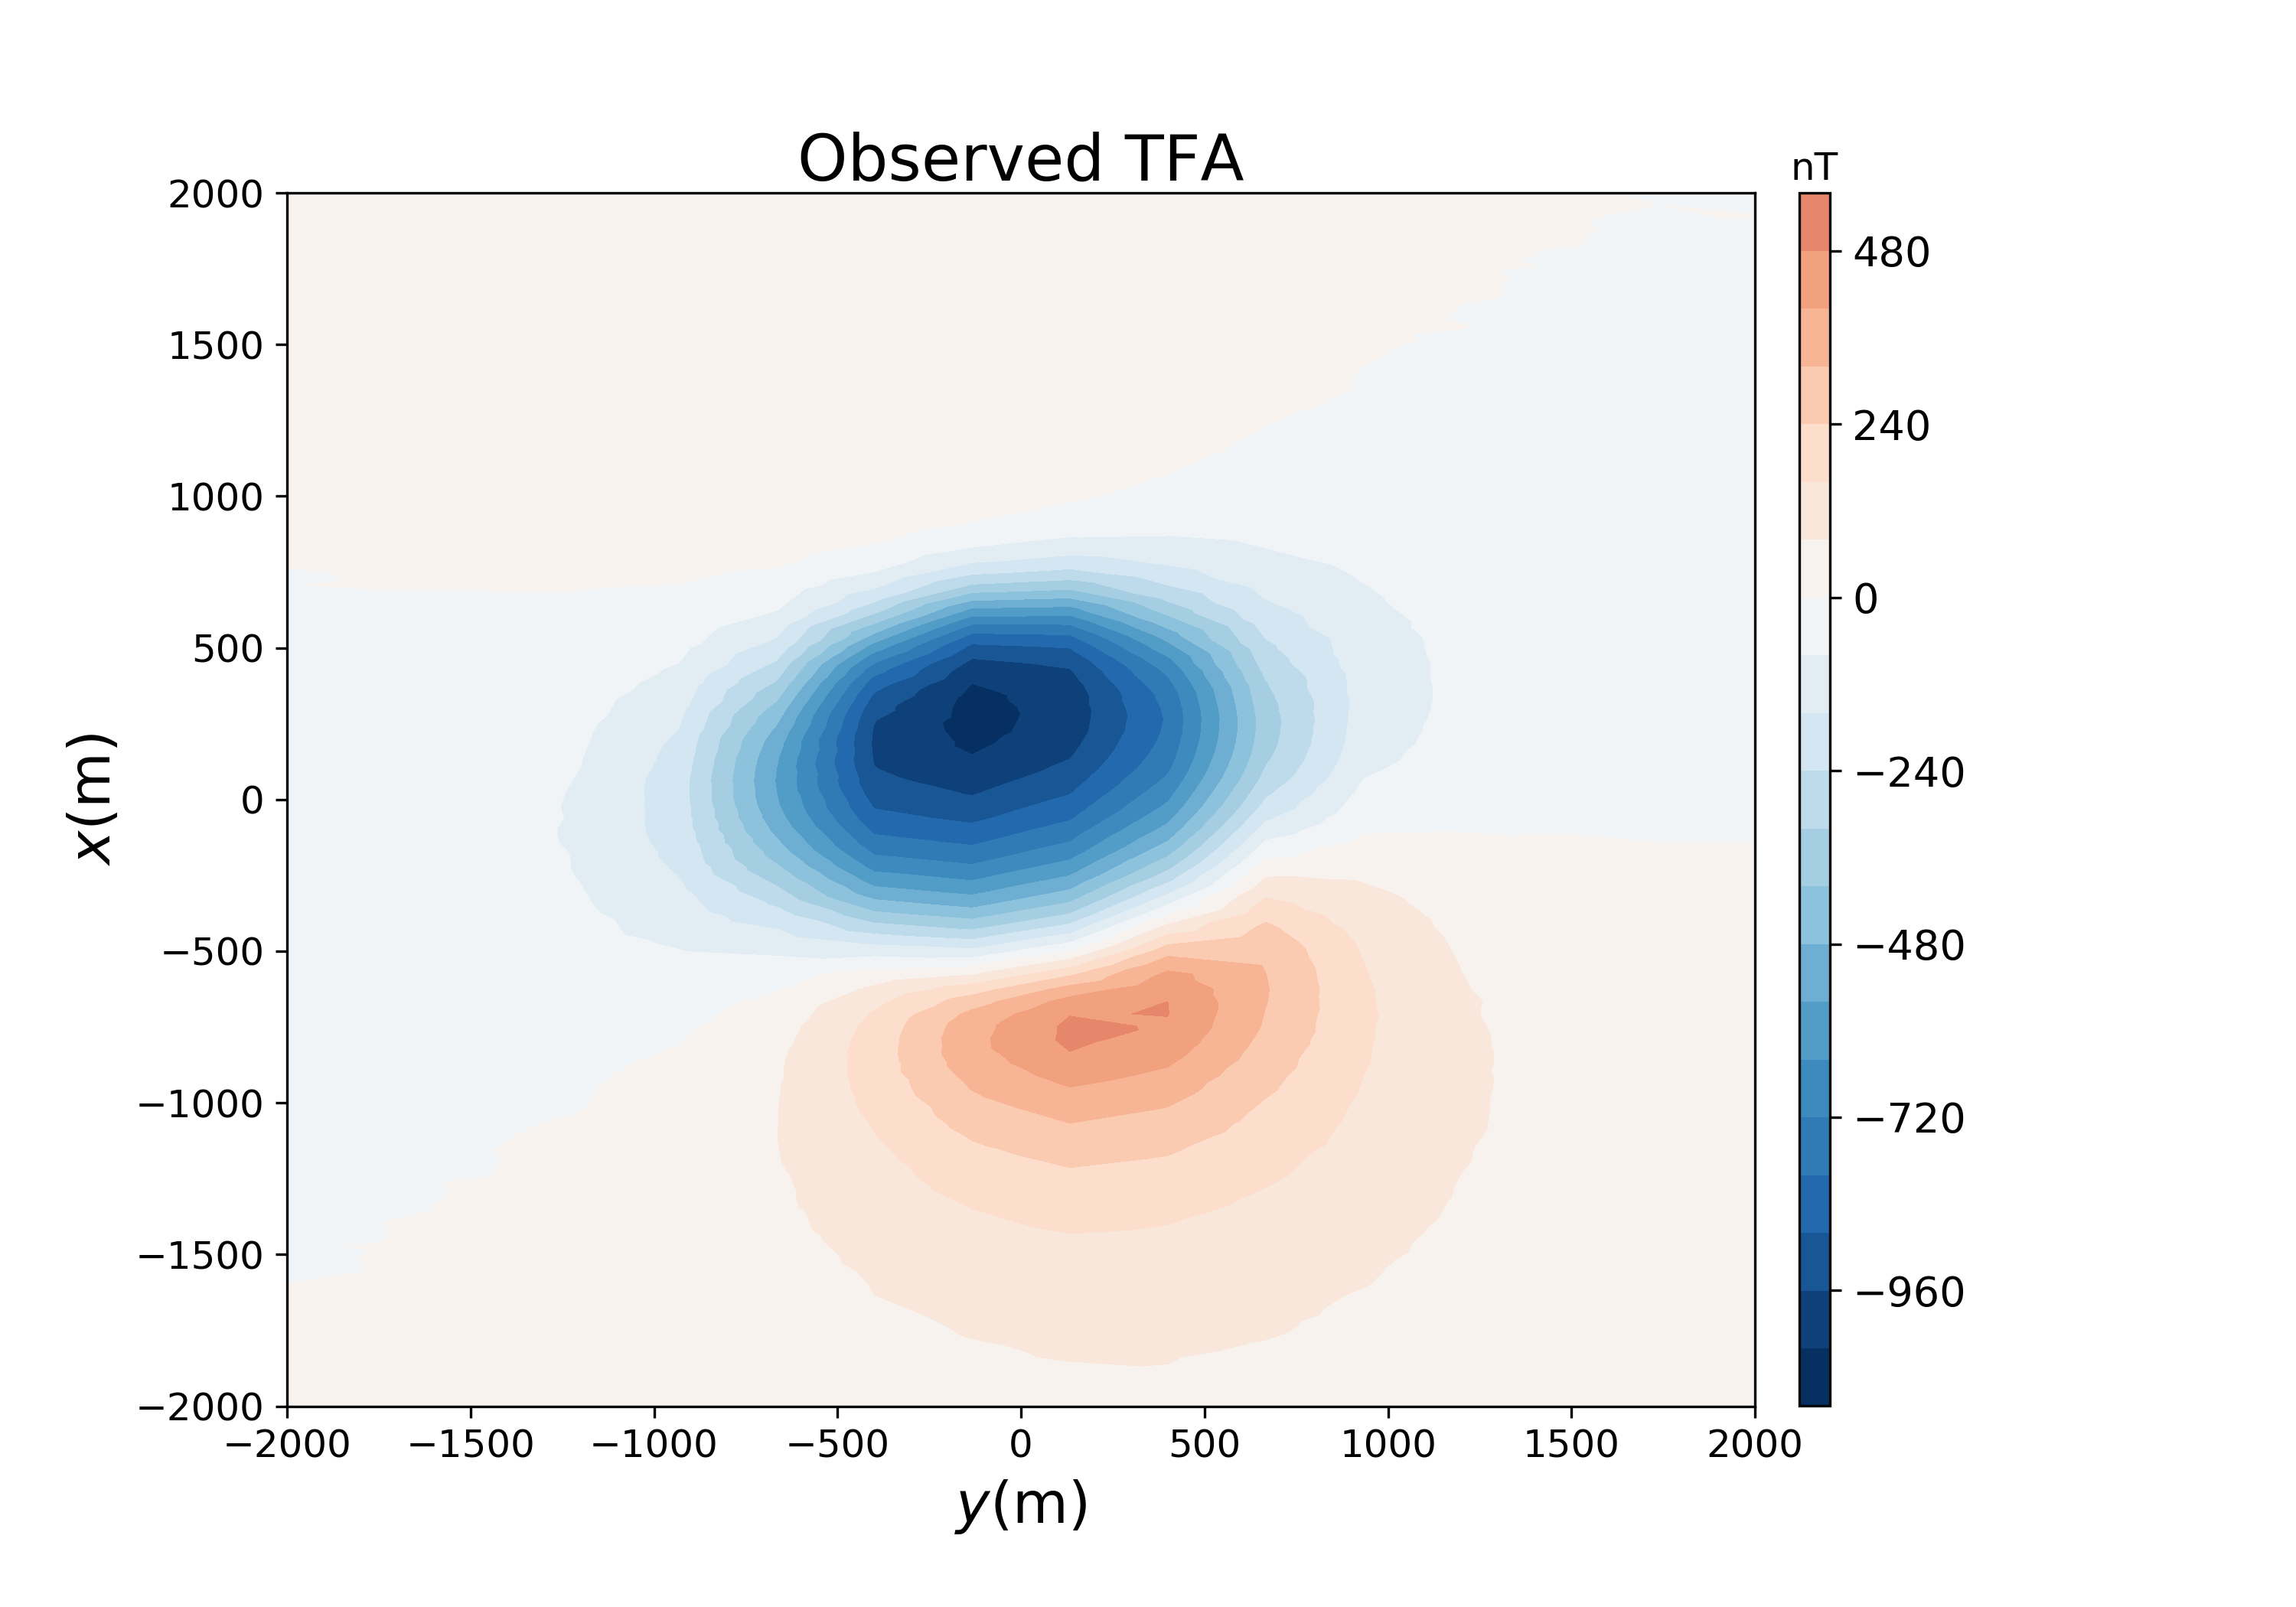

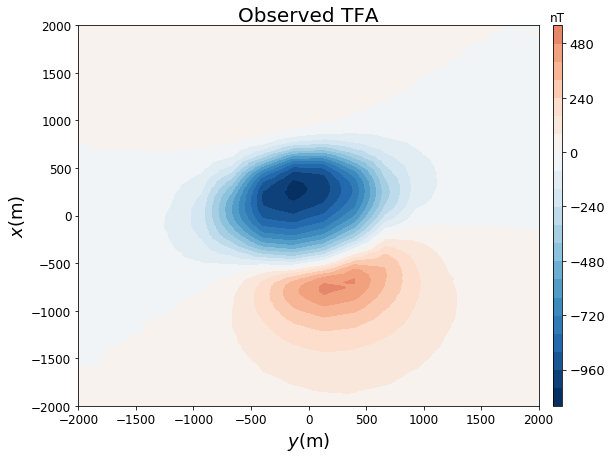

In [807]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['observed_data']), vmax=np.min(kimberlite['observed_data'])*(-1))
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'kimberlite_real_data.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_real_data.png', width=1000, height=1200)

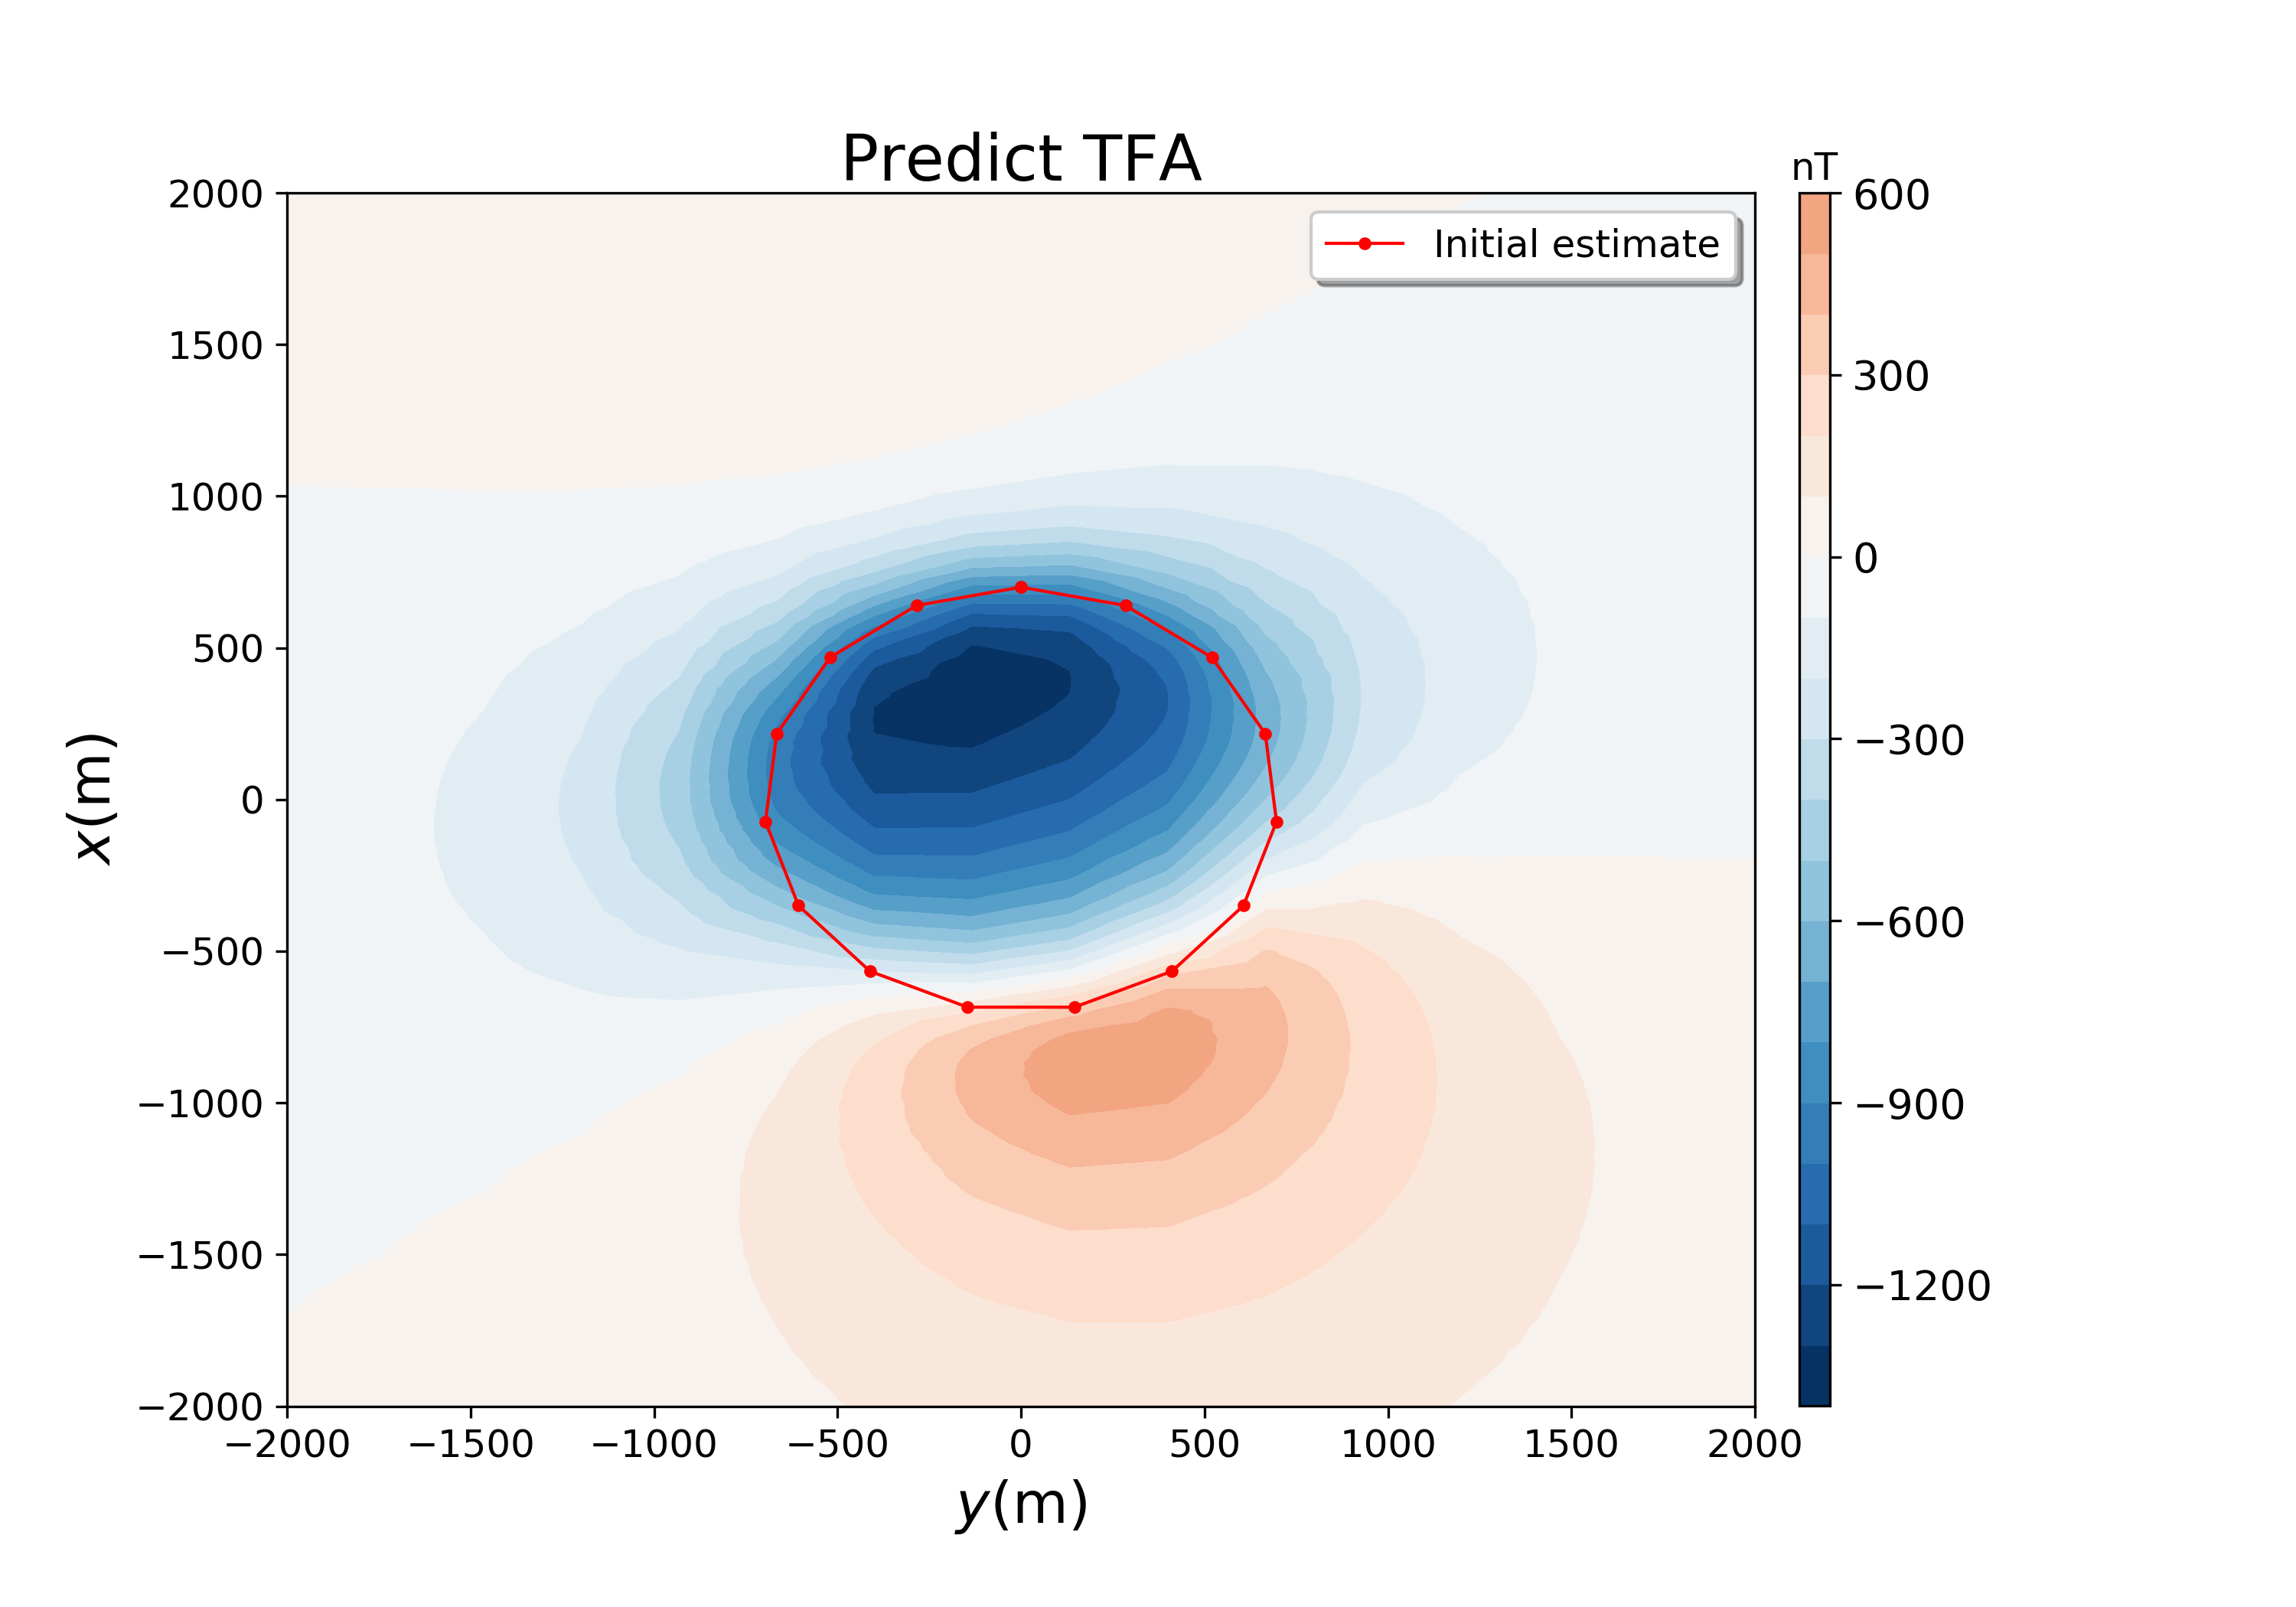

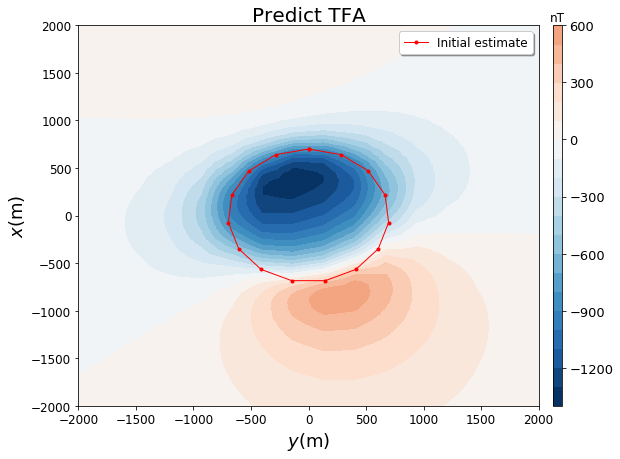

In [808]:
plt.figure(figsize=(10,7))
plt.title('Predict TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['initial_data']), vmax=np.min(kimberlite['initial_data'])*(-1))
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(kimberlite['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_pred_data_true_inital.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_pred_data_true_inital.png', width=1000, height=1200)

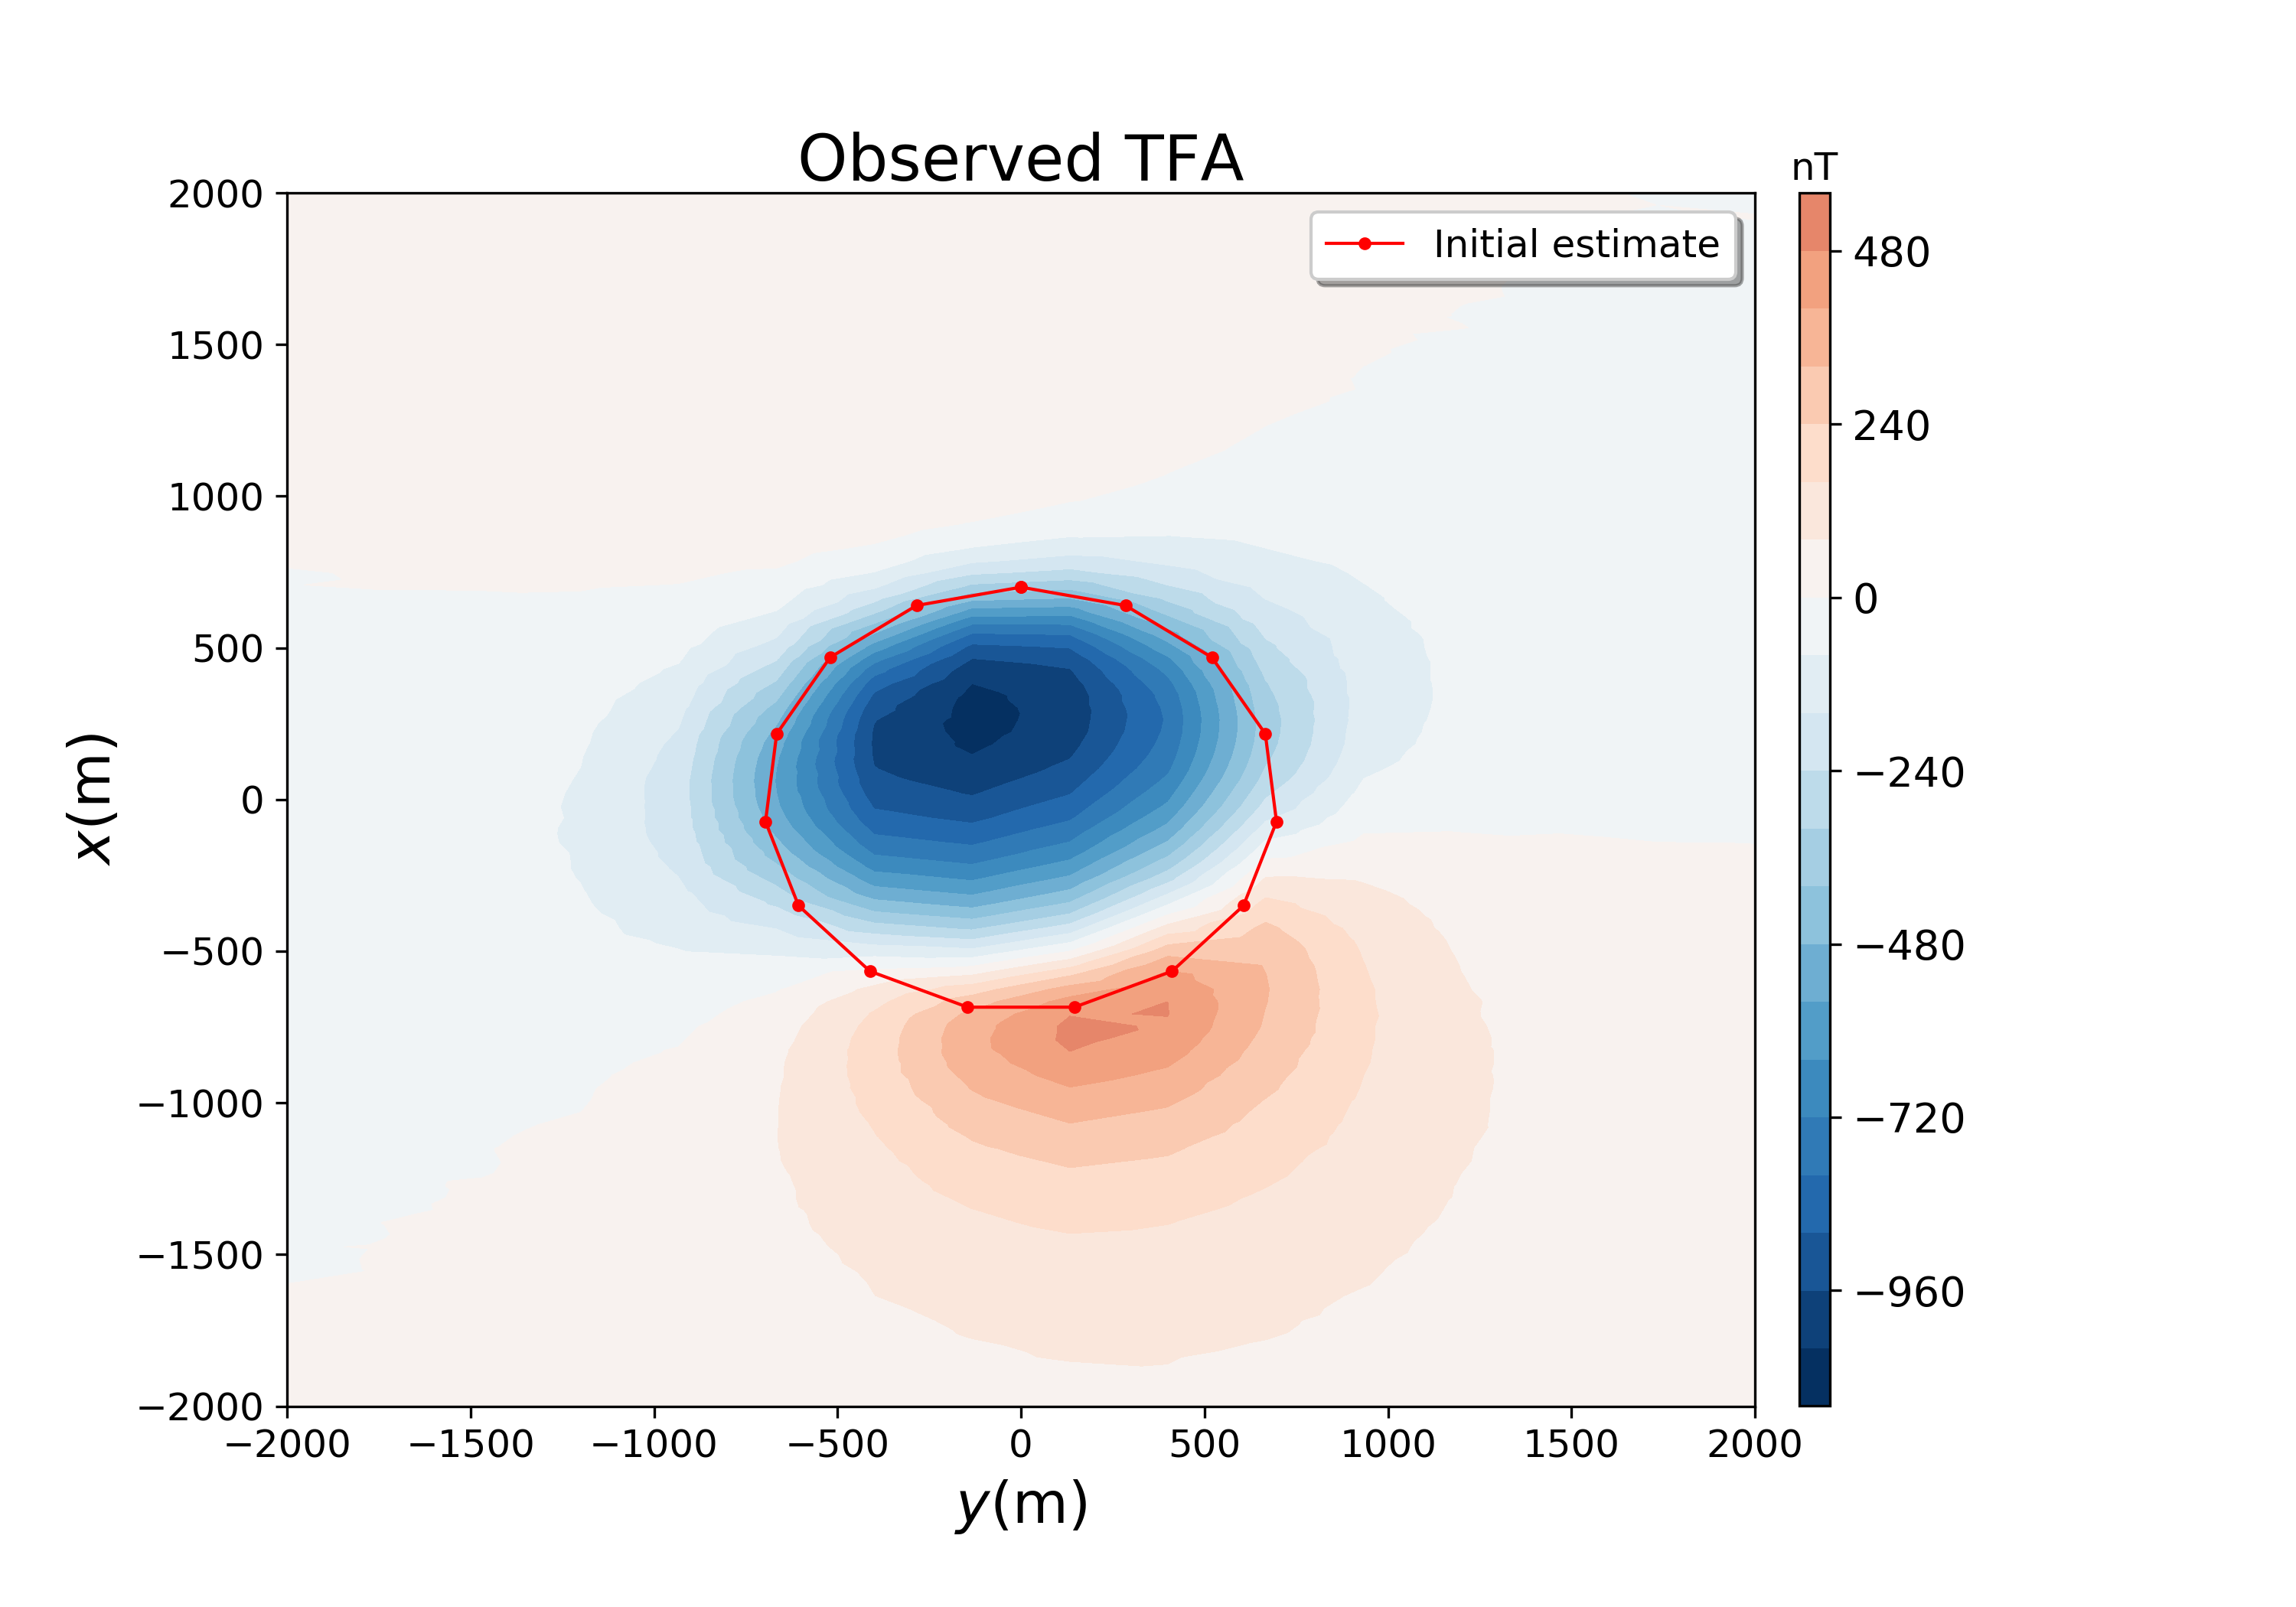

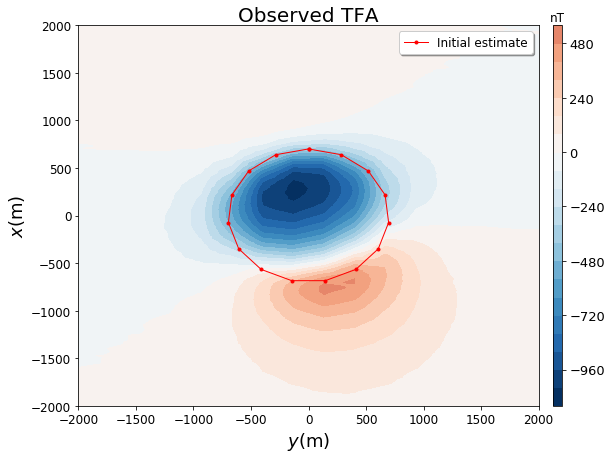

In [809]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['observed_data']), vmax=np.min(kimberlite['observed_data'])*(-1))
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(kimberlite['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_obs_data_true_inital.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_obs_data_true_inital.png', width=1000, height=1200)

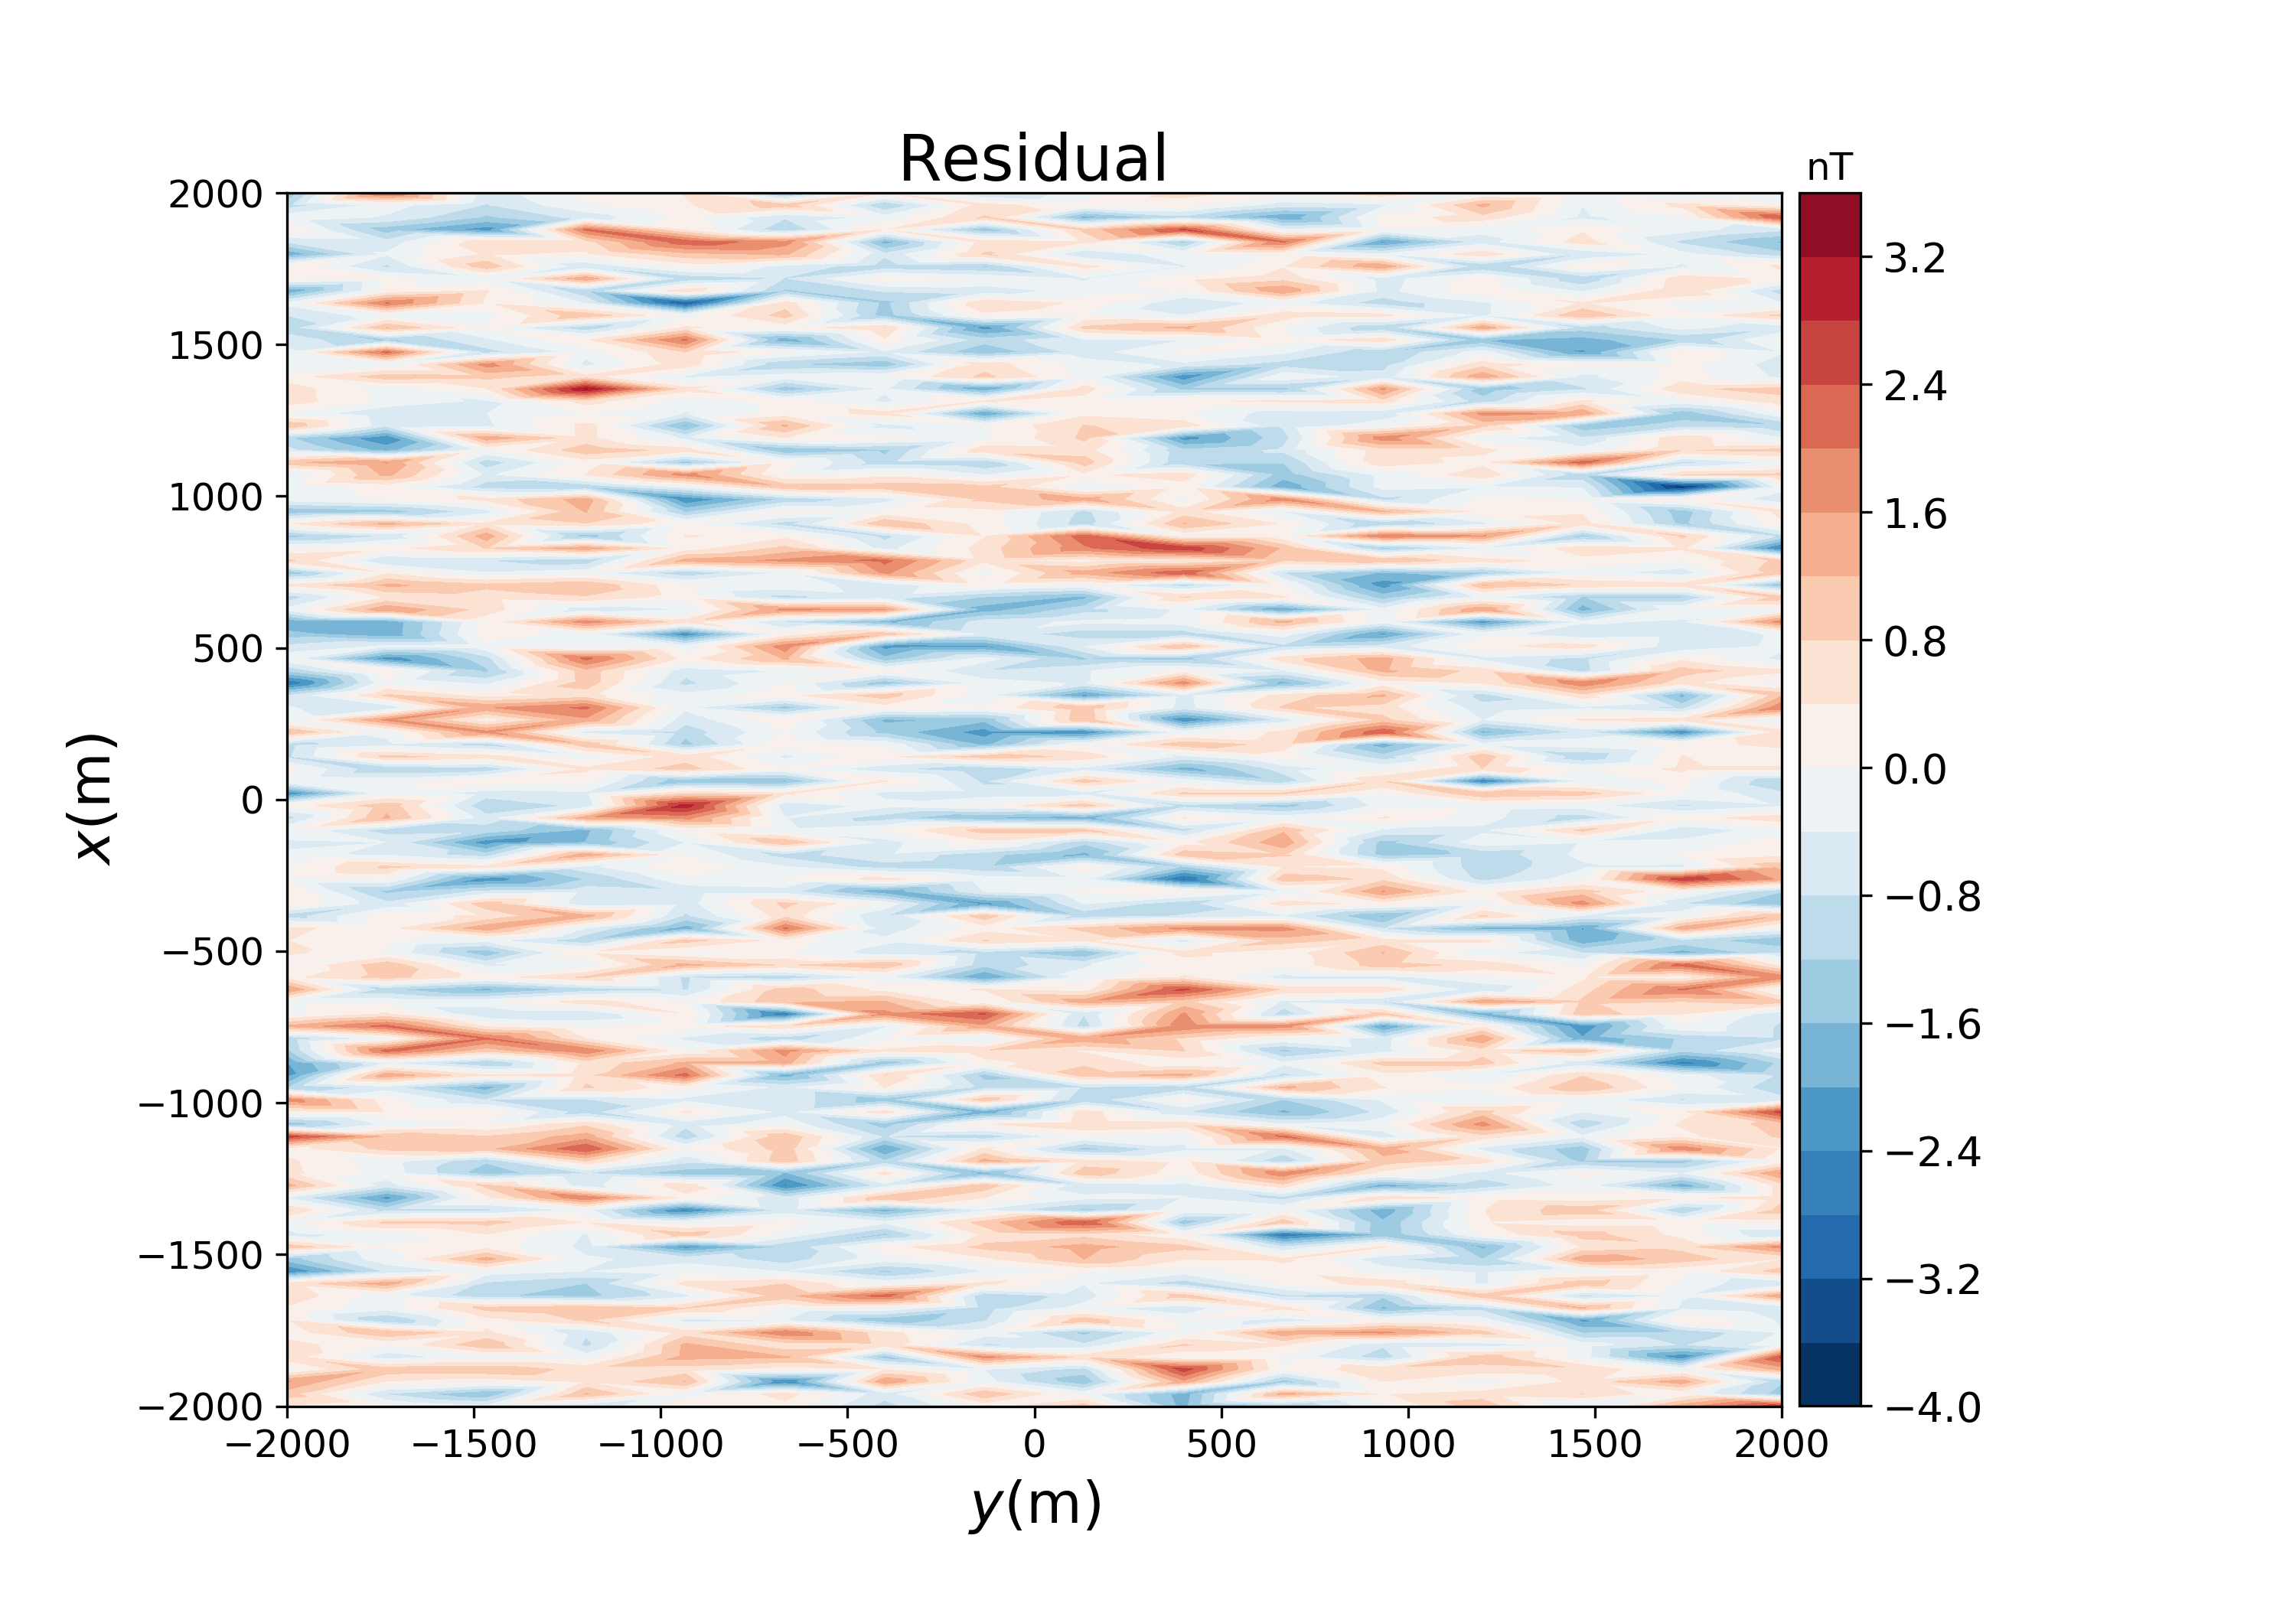

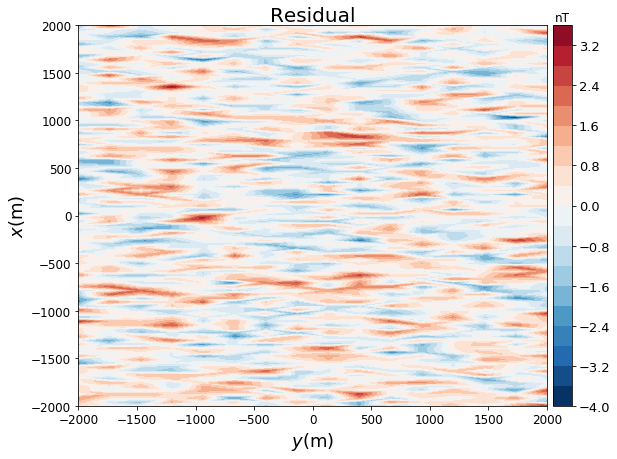

In [810]:
plt.figure(figsize=(10,7))
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['residual']), vmax=np.min(kimberlite['residual'])*(-1))
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'] - kimberlite['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

In [811]:
kimberlite['observed_data'].shape

(1600L,)

In [812]:
kimberlite['data_fit'].shape

(1600L,)

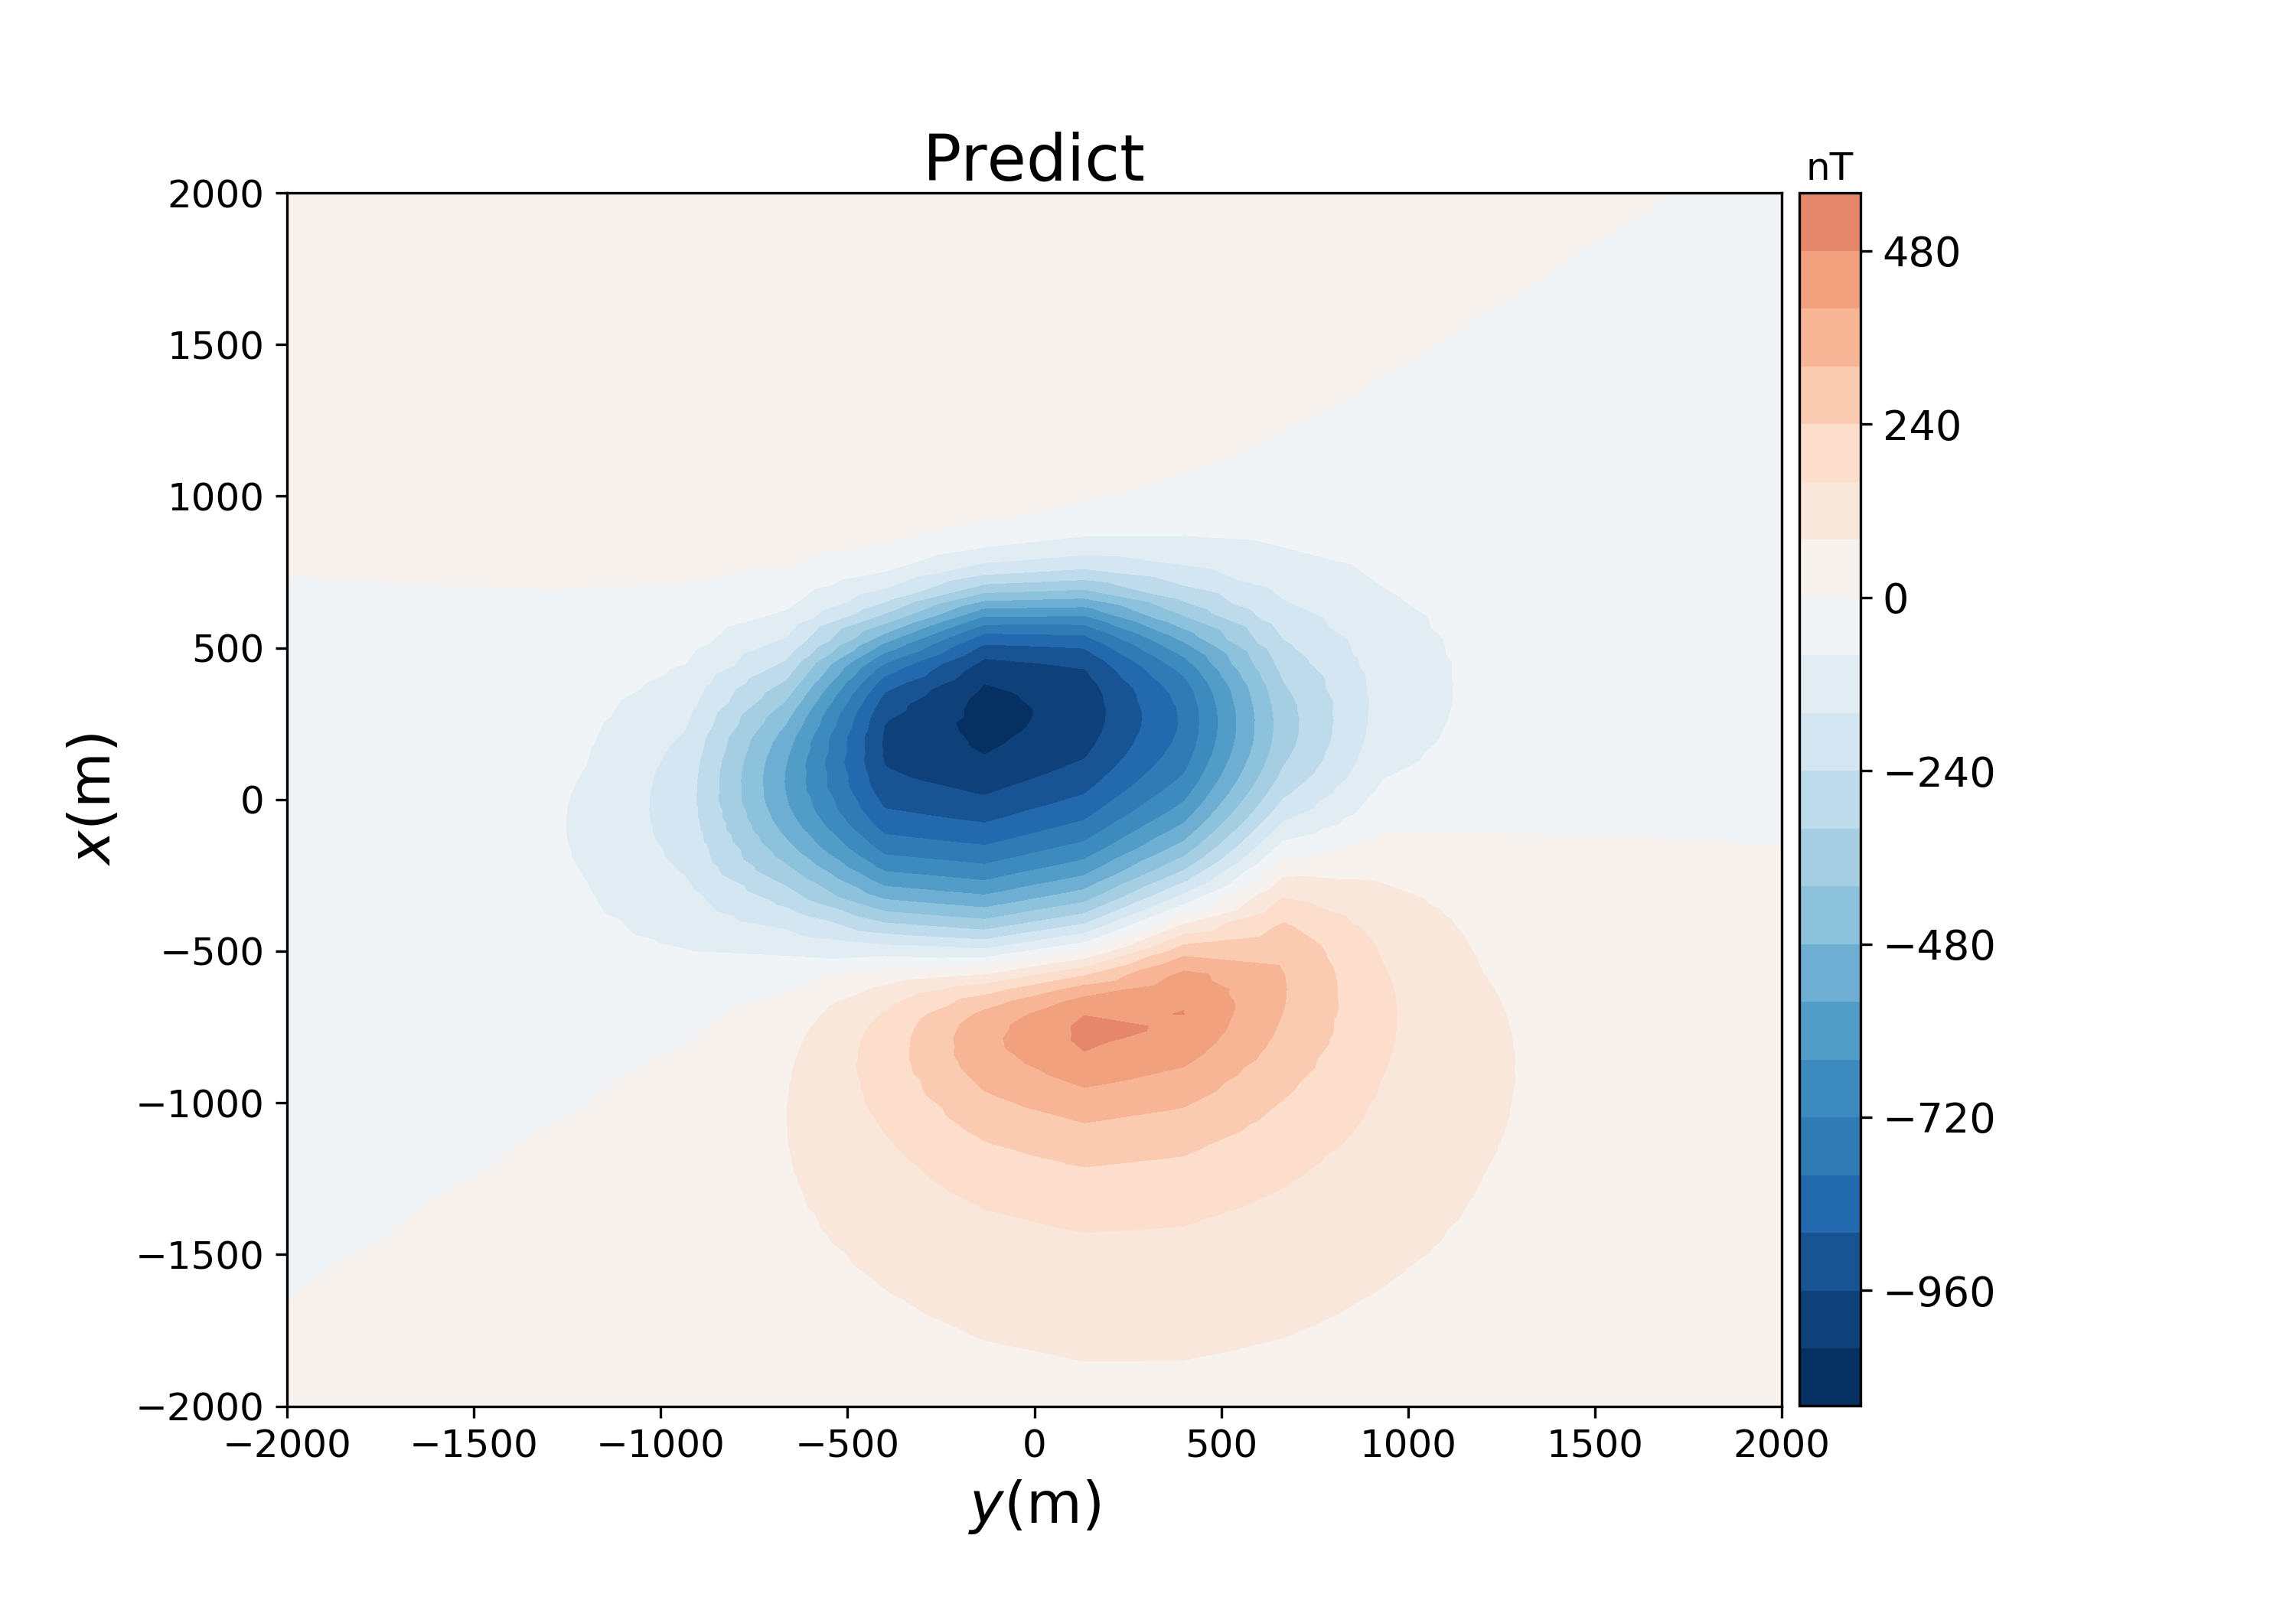

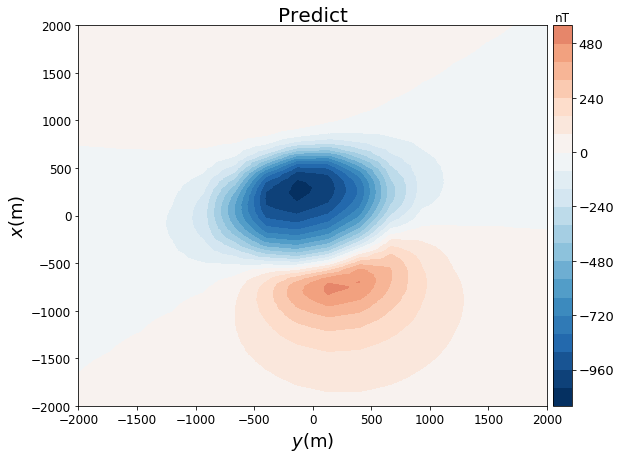

In [813]:
plt.figure(figsize=(10,7))
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['data_fit']), vmax=np.min(kimberlite['data_fit'])*(-1))
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_predict.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_tfa_predict.png', width=1600, height=400)

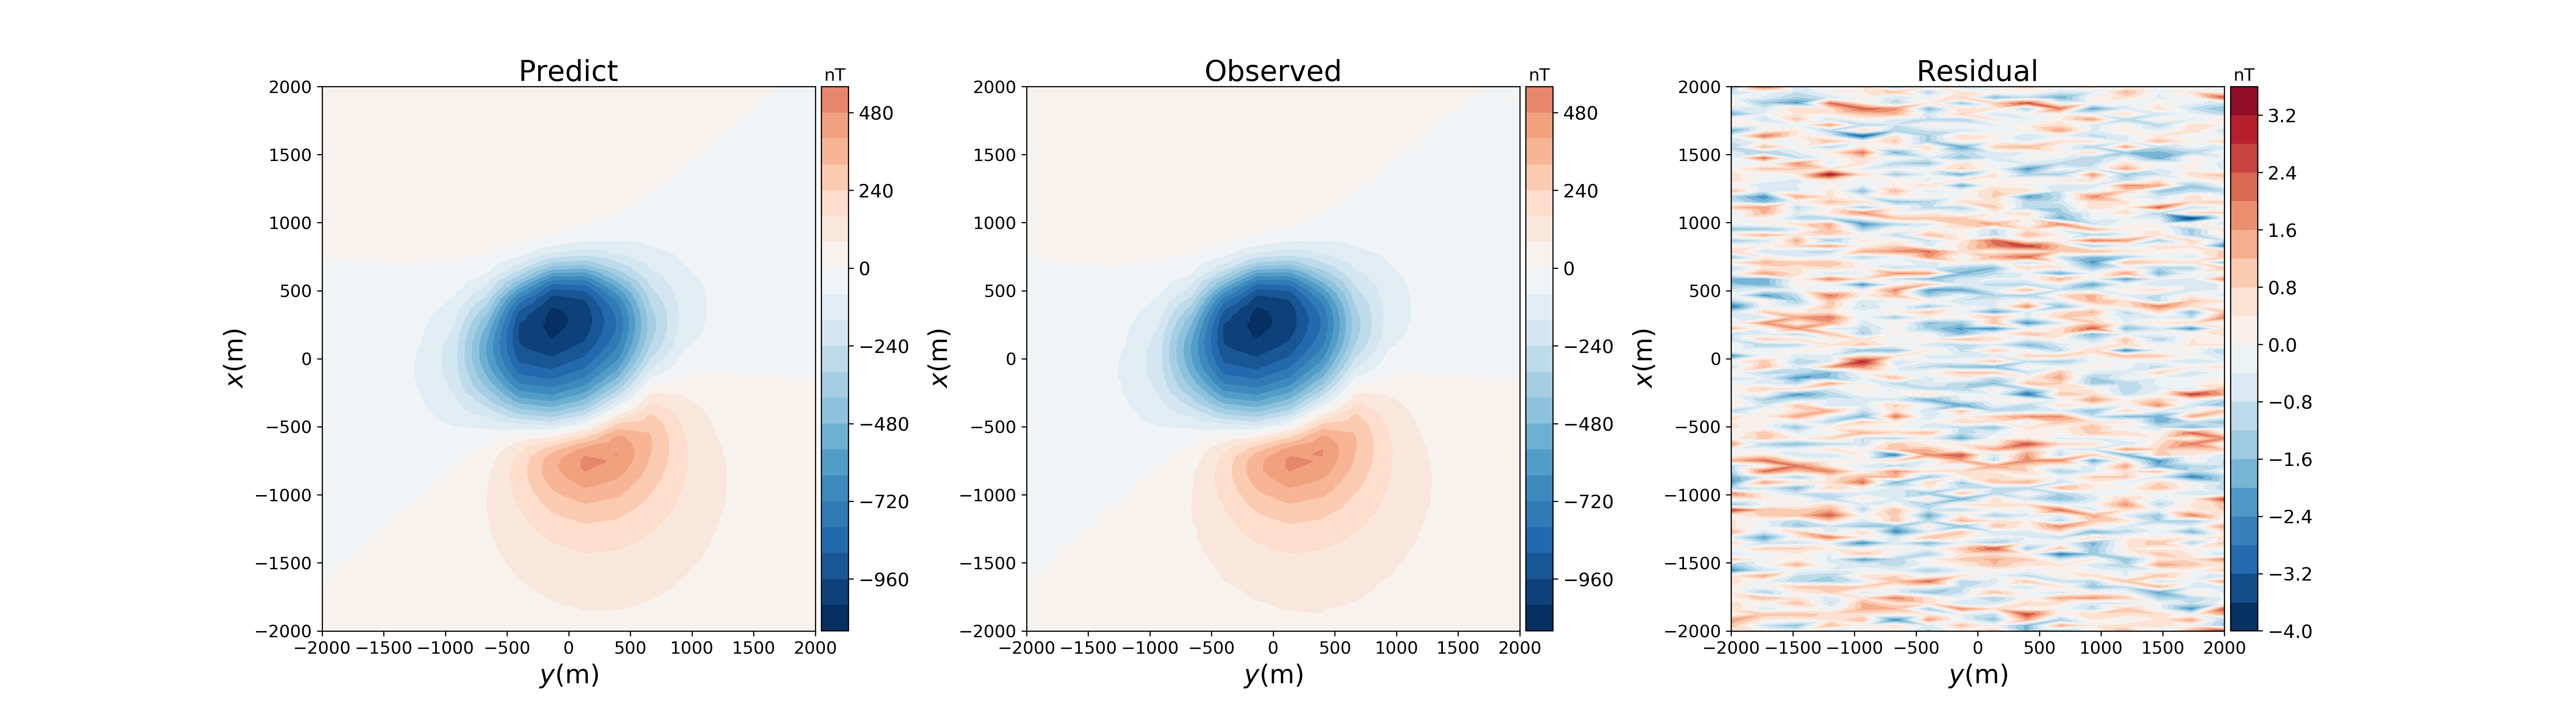

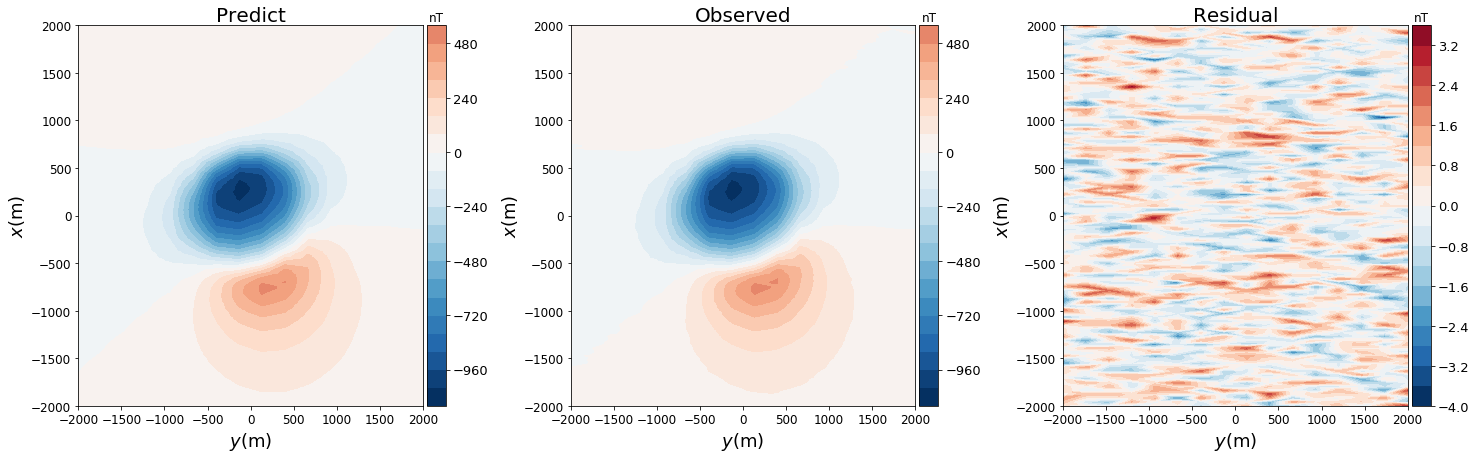

In [814]:
# plot
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['observed_data']), vmax=np.min(kimberlite['observed_data'])*(-1))

plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['data_fit'],20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(kimberlite['residual']), vmax=np.min(kimberlite['residual'])*(-1))
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(kimberlite['x']), np.max(kimberlite['x']))
plt.ylim(np.min(kimberlite['y']), np.max(kimberlite['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_fit.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_tfa_fit.png', width=1600, height=400)

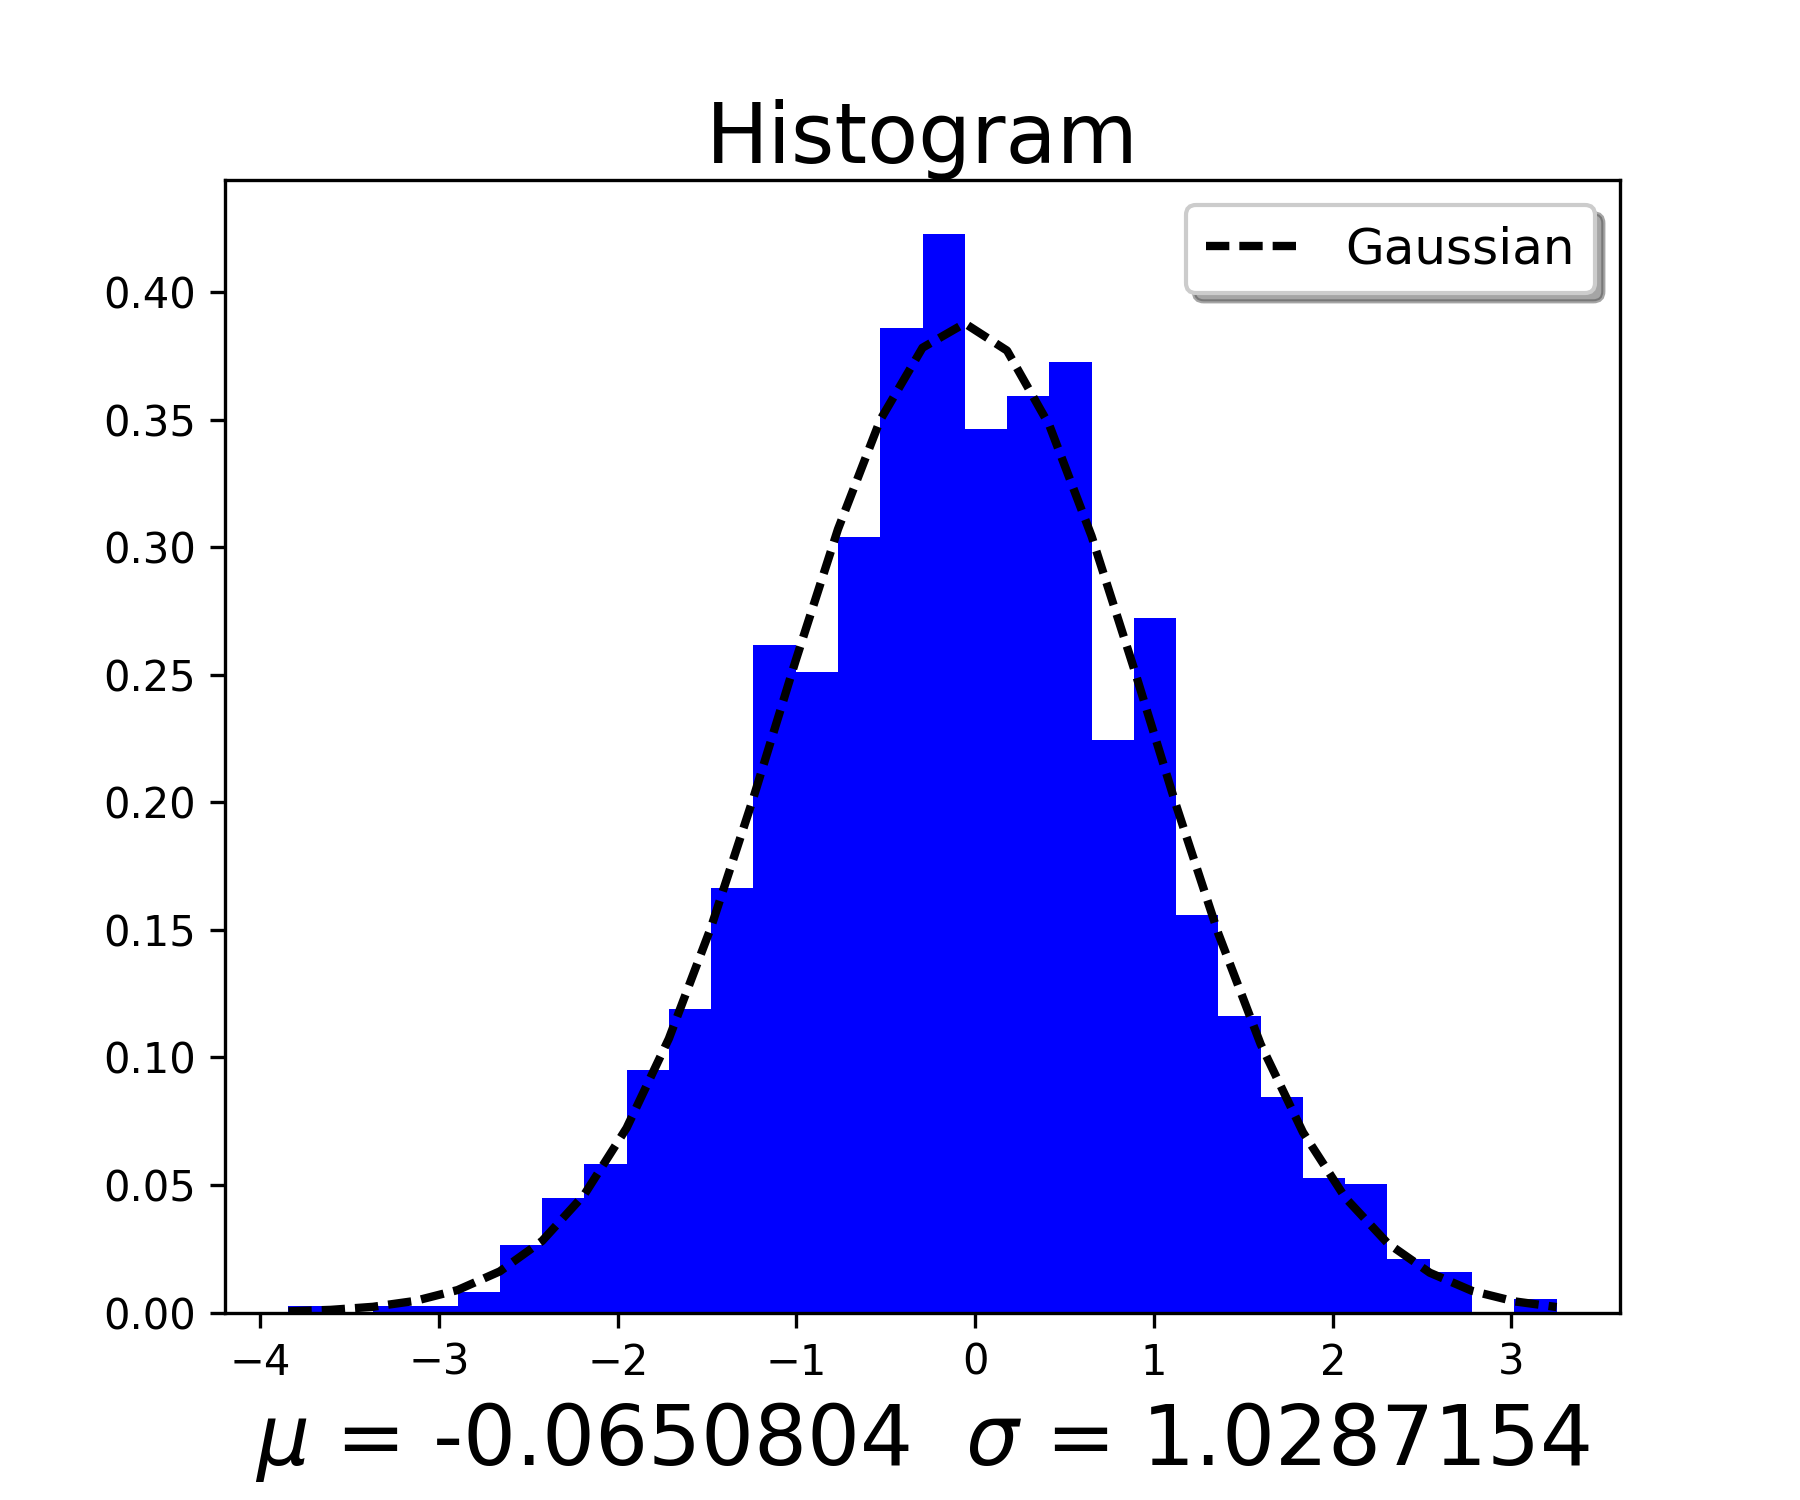

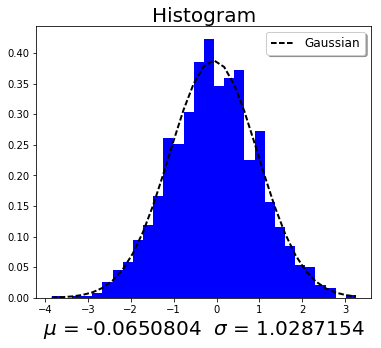

In [815]:
mean = np.mean(kimberlite['residual'])
std = np.std(kimberlite['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
#nbins = int((np.max(kimberlite['residual_norm']) - np.min(kimberlite['residual_norm'])))
nbins=30
n, bins, patches = plt.hist(kimberlite['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.ylim(0.,0.5)
#plt.xlim(-10., 10.)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_hist.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_hist.png', width=400, height=400)

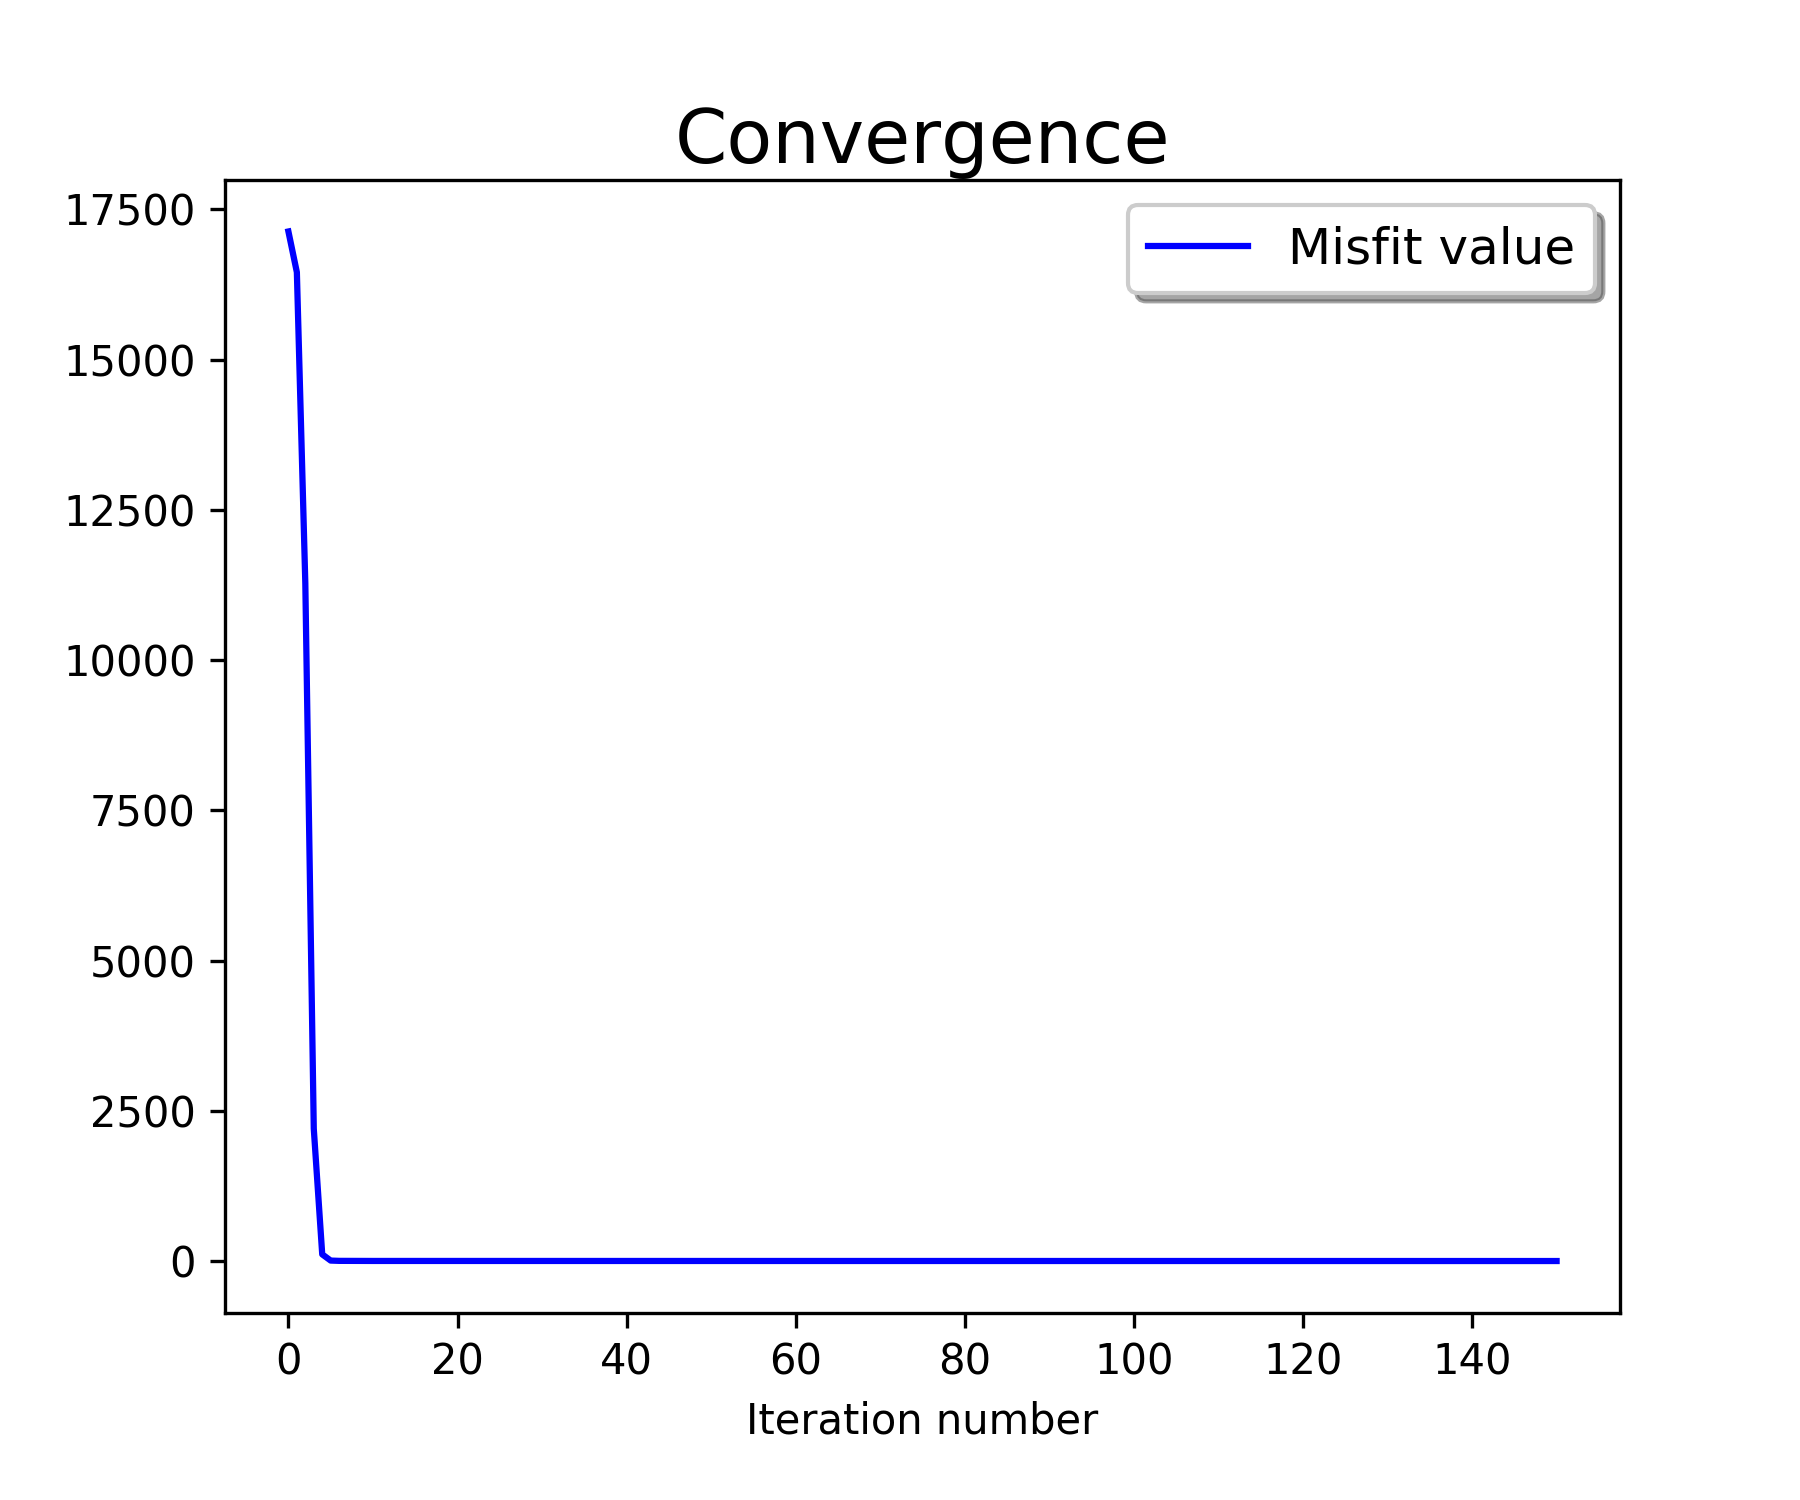

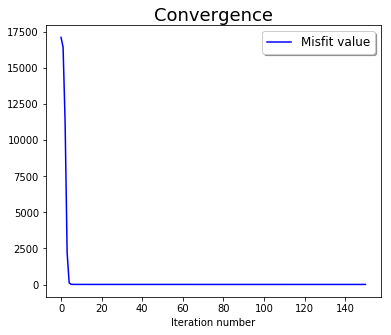

In [816]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(kimberlite['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'kimberlite_tfa_convergence.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_convergence.png', width=400, height=400)

In [817]:
verts = []
for o in kimberlite['prisms']:
    top = []
    bottom = []
    for x, y in zip(o.x, o.y):
        top.append(np.array([x,y,o.z1]))
        bottom.append(np.array([x,y,o.z2]))
    verts.append(top)
    verts.append(bottom)
    for i in range(o.x.size-1):
        sides = []
        sides.append(np.array([o.x[i], o.y[i], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z2]))
        sides.append(np.array([o.x[i], o.y[i], o.z2]))
        verts.append(sides)
    sides = []
    sides.append(np.array([o.x[-1], o.y[-1], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z2]))
    sides.append(np.array([o.x[-1], o.y[-1], o.z2]))
    verts.append(sides)

In [818]:
verts_true = []
for o in kimberlite_model['prisms']:
    top = []
    bottom = []
    for x, y in zip(o.x, o.y):
        top.append(np.array([x,y,o.z1]))
        bottom.append(np.array([x,y,o.z2]))
    verts_true.append(top)
    verts_true.append(bottom)
    for i in range(o.x.size-1):
        sides = []
        sides.append(np.array([o.x[i], o.y[i], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z2]))
        sides.append(np.array([o.x[i], o.y[i], o.z2]))
        verts_true.append(sides)
    sides = []
    sides.append(np.array([o.x[-1], o.y[-1], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z2]))
    sides.append(np.array([o.x[-1], o.y[-1], o.z2]))
    verts_true.append(sides)

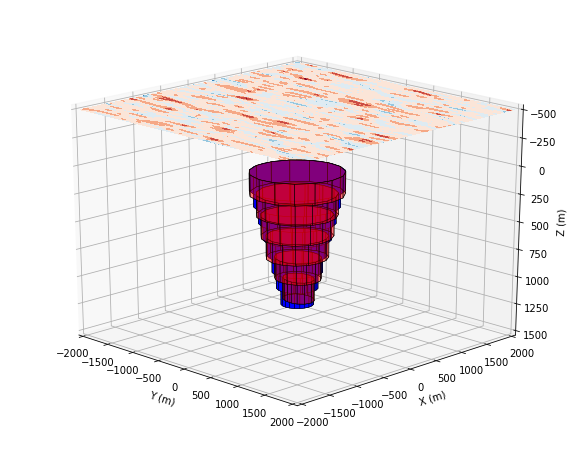

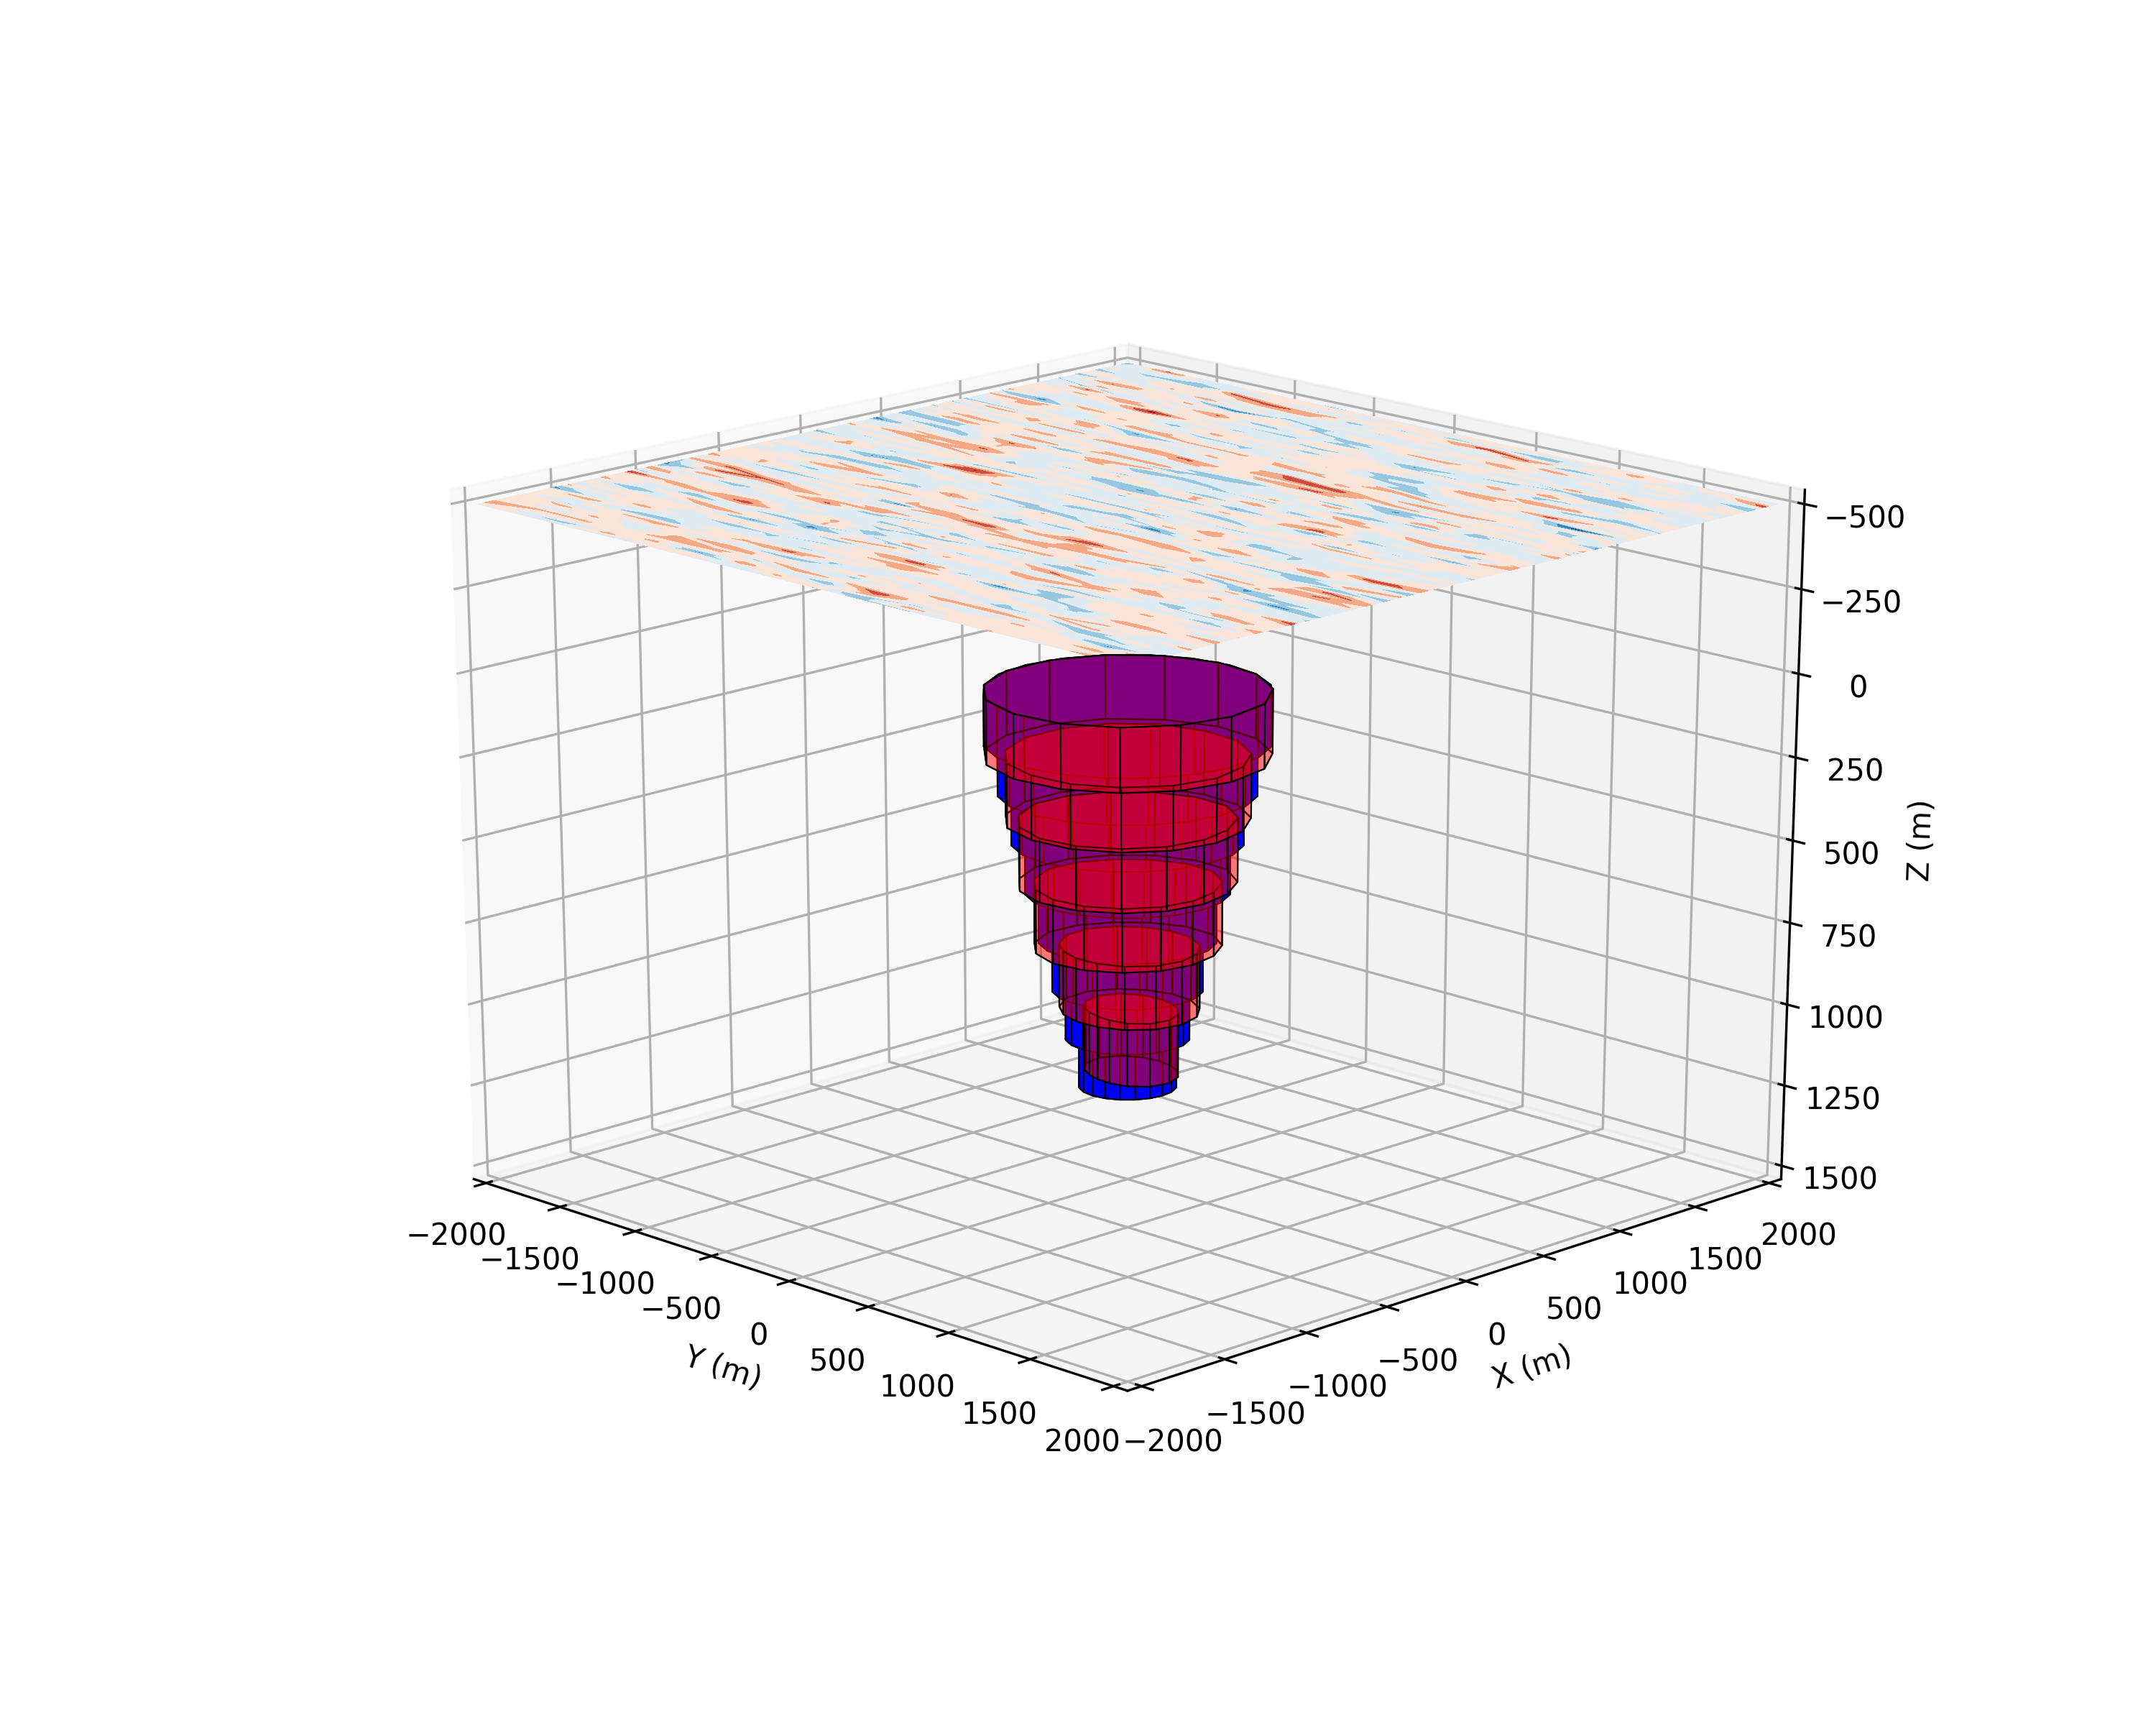

In [819]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=1, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-2000, 2000, 100)
ax.set_ylim(-2000, 2000, 100)
ax.set_zlim(1500,-500,100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(20, -45)

norm=mpb.colors.Normalize(vmin=np.min(kimberlite['residual']), vmax=np.min(kimberlite['residual'])*(-1))
ax.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['residual'],
                zdir='z', offset=-500, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate.png', dpi=300)
plt.show()

img(filename=mypath+'kimberlite_3d_estimate.png', width=400, height=400)

In [820]:
# Show the model
scene = myv.figure(size=(500,400))
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(kimberlite['prisms'], 'magnetization', color=red, linewidth=1., opacity=1.)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [-1210.0445213155442, -6670.9682614114663, 359.47037872353184]
scene.scene.camera.focal_point = [1.51112325816375e-12, 4.5333697744912496e-12, 950.00000000000205]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.036819949950466738, 0.081488938214263576, -0.99599389768931668]
scene.scene.camera.clipping_range = [4251.6348306369673, 10036.692106092029]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_tfa_bolacha0.png')
myv.show()